# HDF5 viewer for large C2020 catalog

I reran the photozs on Feb. 9 including **inflating the uncertainties in the four IRAC bands by a factor of 5**, witt output files with root `COSMOS2020_FARMER_R1_v2.1`.   This required a virtual compute machine on Amazon Web Services with > 100 Gb of memory!

At the same time I added functionality to the `eazy-py` repository to make saving and recovering the state of an EAZY run more robust using `HDF5` files.  At least for just plotting SEDs, there is now a function to do this using the `HDF5` product directly rather than reading the huge arrays into memory.

The products are available at 

https://erda.ku.dk/vgrid/Gabriel%20Brammer/C2020/Farmer2.0/COSMOS2020_FARMER_R1_v2.1.hdf5
https://erda.ku.dk/vgrid/Gabriel%20Brammer/C2020/Farmer2.0/COSMOS2020_FARMER_R1_v2.1.zout.fits

You can now plot the SEDs *with just the HDF5 file* as shown below.

In [2]:
import os
# Running on Erda
os.chdir('/Users/claus/Documents/jupyter/research/Cosmos2021/')
# Available through https://erda.ku.dk/vgrid/Gabriel%20Brammer/C2020/Farmer2.0/

In [2]:
! ls -lh *v2.1* templates/

Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [5]:
import eazy
#if not os.path.exists('FILTER.RES.latest'):
#    data_path = os.path.join(os.path.dirname(eazy.__file__), 'data')
#    ! copy {data_path}/filters/FILTER.RES.latest . 

In [6]:
import eazy.hdf5
vis = eazy.hdf5.Viewer('COSMOS2020_FARMER_R1_v2.1.hdf5', verbose=False)

ModuleNotFoundError: No module named 'eazy.hdf5'

In [5]:
# Reformatted catalog from hdf5
# This will require some memory, so it could 
# be useful to add some functionality to eazy.hdf5 to pull out individual columns
cat = vis.get_catalog()
cat.info()

<Table length=964506>
       name         dtype  format
------------------ ------- ------
                id   int64       
                ra float64    .6f
               dec float64    .6f
            z_spec float64    .5f
   CFHT_ustar_FLUX float32    .3f
CFHT_ustar_FLUXERR float32    .3f
       CFHT_u_FLUX float32    .3f
    CFHT_u_FLUXERR float32    .3f
        HSC_g_FLUX float32    .3f
     HSC_g_FLUXERR float32    .3f
        HSC_r_FLUX float32    .3f
     HSC_r_FLUXERR float32    .3f
        HSC_i_FLUX float32    .3f
     HSC_i_FLUXERR float32    .3f
        HSC_z_FLUX float32    .3f
     HSC_z_FLUXERR float32    .3f
        HSC_y_FLUX float32    .3f
     HSC_y_FLUXERR float32    .3f
    UVISTA_Ks_FLUX float32    .3f
 UVISTA_Ks_FLUXERR float32    .3f
     UVISTA_Y_FLUX float32    .3f
  UVISTA_Y_FLUXERR float32    .3f
     UVISTA_H_FLUX float32    .3f
  UVISTA_H_FLUXERR float32    .3f
     UVISTA_J_FLUX float32    .3f
  UVISTA_J_FLUXERR float32    .3f
     IRAC_CH1_FLUX float32

In [6]:
import numpy as np

# Quick selection
kmag = 23.9 - 2.5*np.log10(cat['UVISTA_Ks_FLUX']*vis.to_uJy)

sample = (cat['z_spec'] > 0.2) & (cat['z_spec'] < 4) & (kmag < 22)

ids = cat['id'][sample]
i = -1

<ipython-input-6-175a4ea01d39>:4: RuntimeWarning: invalid value encountered in log10
  kmag = 23.9 - 2.5*np.log10(cat['UVISTA_Ks_FLUX']*vis.to_uJy)


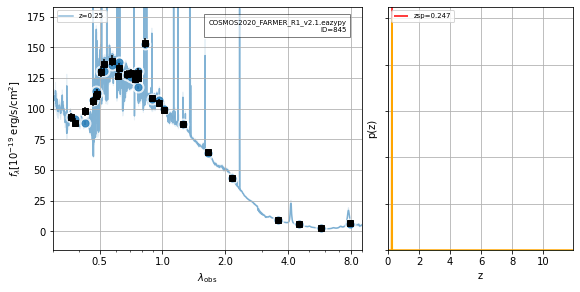

In [8]:
i = 6
_ = vis.show_fit(ids[i], show_fnu=False)

In [11]:
print(eazy.__version__)

0.5.2


In [12]:
catalog = eazy.hdf5.cat_from_hdf5('COSMOS2020_FARMER_R1_v2.1.hdf5')

AttributeError: module 'eazy' has no attribute 'hdf5'